In [1]:
library(selbal)
library(grid)

In [33]:
lod = function(f1='../feature_tables/51N_genus_t70.csv',
                f2='./target.csv',
                f3='./covariates.csv') {
    x = as.matrix(read.table(f1, sep = ',', row.names=1, header=TRUE))
    x <- x[rownames(x)!='195S1',]
    y = as.vector(read.table(f2, sep = ',', row.names=1, header=TRUE))
    y <- y[rownames(y)!='195S1',]
    z = as.matrix(read.table(f3, sep = ',', row.names=1, header=TRUE))
    z <- z[rownames(z)!='195S1',]
    list('x'=x,'y'=y,'z'=z)
}

In [34]:
sel = function(data, nvar=5, covar=TRUE, method='AUC') {
    if (covar==TRUE) {
        mod = selbal(data$x, as.factor(data$y), covar=data$z, logit.acc=method, maxV=nvar)
    }
    else {
        mod = selbal(data$x, as.factor(data$y), logit.acc=method, maxV=nvar)
    }
    (mod$balance.selection)
    mod
}

Warning message in cmultRepl(x, suppress.print = T):
"Column(s) containing more than 80% zeros/unobserved values were found (check it out using zPatterns).
                    (You can use the z.warning argument to modify the warning threshold)."
Warning message in cmultRepl(x, suppress.print = T):
"Row(s) containing more than 80% zeros/unobserved values were found (check it out using zPatterns).
                  (You can use the z.warning argument to modify the warning threshold)."


NUMERATOR,DENOMINATOR,ACC,Increase
<chr>,<chr>,<dbl>,<dbl>
Dialister,Ezakiella,0.71154,0.71154
Campylobacter,-,0.74519,0.03365
-,Bifidobacterium,0.75160,0.00641


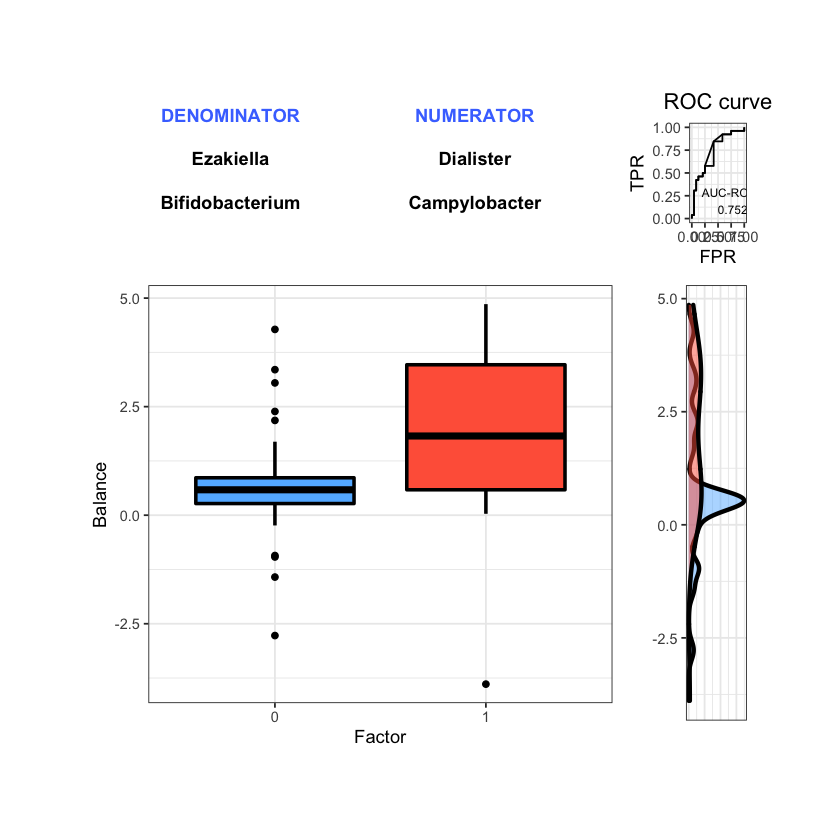

In [51]:
#d=lod(f1='../feature_tables/51N_genus_t70_nozero.csv')
d=lod()
#m=sel(d)
m=sel(d,covar=FALSE)
m$balance.selection

Warning message in cmultRepl(x, suppress.print = T):
"Column(s) containing more than 80% zeros/unobserved values were found (check it out using zPatterns).
                    (You can use the z.warning argument to modify the warning threshold)."
Warning message in cmultRepl(x, suppress.print = T):
"Row(s) containing more than 80% zeros/unobserved values were found (check it out using zPatterns).
                  (You can use the z.warning argument to modify the warning threshold)."


NUMERATOR,DENOMINATOR,ACC,Increase
<chr>,<chr>,<dbl>,<dbl>
Lactobacillus,Eisenbergiella,0.09052,0.09052
-,Streptococcus,0.11877,0.02825
-,Bacteroides,0.14177,0.02300
Ruminococcus,-,0.16289,0.02112


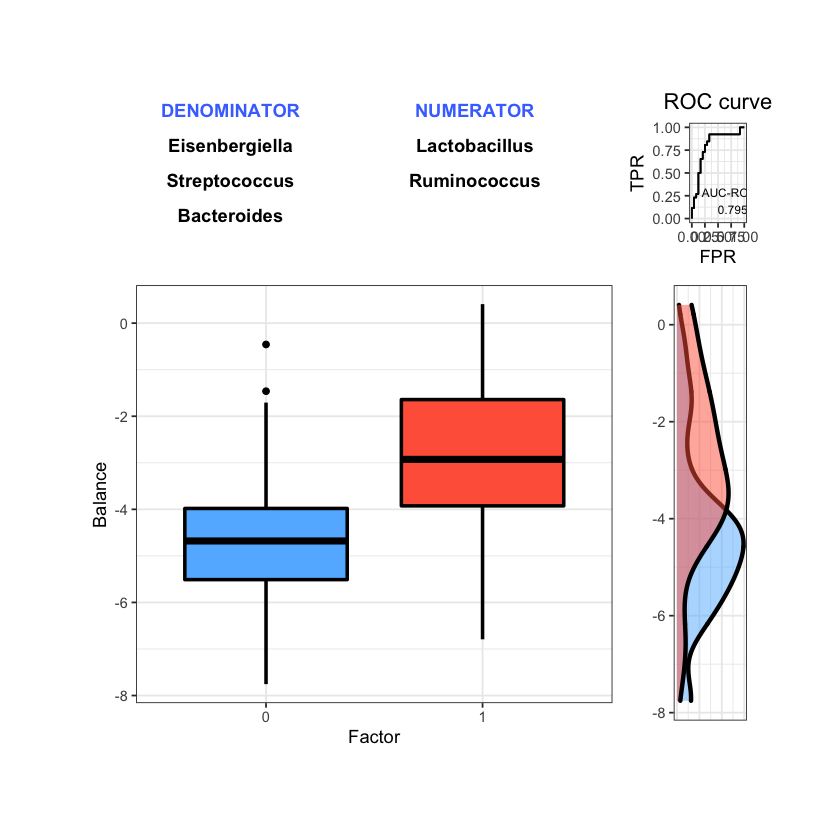

In [52]:
m=sel(d,method='Dev',covar=FALSE)
m$balance.selection

Warning message in cmultRepl(x, suppress.print = T):
"Column(s) containing more than 80% zeros/unobserved values were found (check it out using zPatterns).
                    (You can use the z.warning argument to modify the warning threshold)."
Warning message in cmultRepl(x, suppress.print = T):
"Row(s) containing more than 80% zeros/unobserved values were found (check it out using zPatterns).
                  (You can use the z.warning argument to modify the warning threshold)."


NUMERATOR,DENOMINATOR,ACC,Increase
<chr>,<chr>,<dbl>,<dbl>
Anaerococcus,Peptoniphilus,0.11420,0.11420
Lactobacillus,-,0.11569,0.00148
-,Eisenbergiella,0.21975,0.10406
Campylobacter,-,0.26684,0.04709


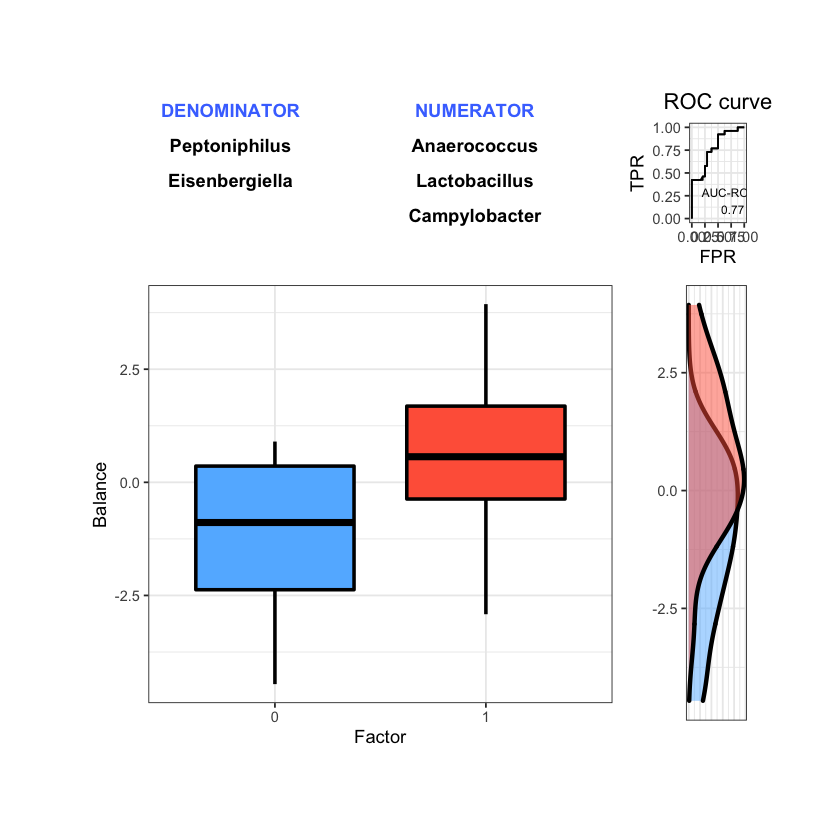

In [53]:
m=sel(d,method='Tjur',covar=FALSE)
m$balance.selection

Warning message in cmultRepl(x, suppress.print = T):
"Column(s) containing more than 80% zeros/unobserved values were found (check it out using zPatterns).
                    (You can use the z.warning argument to modify the warning threshold)."
Warning message in cmultRepl(x, suppress.print = T):
"Row(s) containing more than 80% zeros/unobserved values were found (check it out using zPatterns).
                  (You can use the z.warning argument to modify the warning threshold)."


NUMERATOR,DENOMINATOR,ACC,Increase
<chr>,<chr>,<dbl>,<dbl>
Anaerococcus,Peptoniphilus,0.12294,0.12294


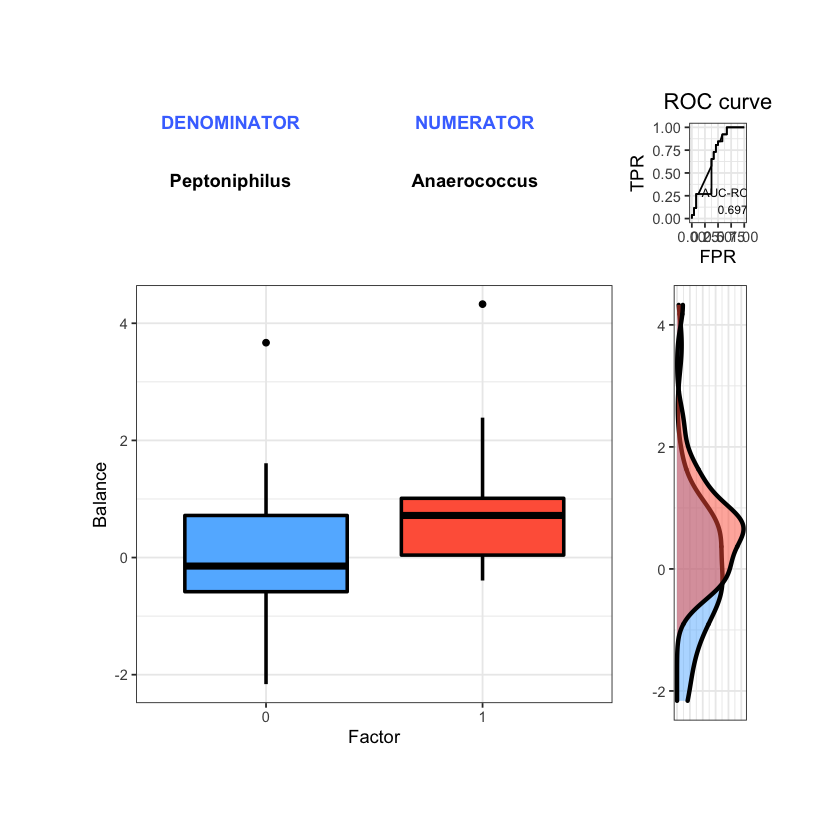

In [54]:
m=sel(d,method='Rsq',covar=FALSE)
m$balance.selection